In [1]:
# import libraries
import numpy as np
import xarray as xr
import midlevelscaling
import matplotlib.pyplot as plt

In [2]:
# uses conditional statistics to calculate the diagnostic mid-level scaling of Cronin and Wing (2017)
midlev_dataset295 = midlevelscaling.midlevelscaling('/home/cstauffer/DATA/PROFILES/CONSTATS/cfv2/large295/SAM-CRM_large295_cfv2_alltimes.nc')
midlev_dataset300 = midlevelscaling.midlevelscaling('/home/cstauffer/DATA/PROFILES/CONSTATS/cfv2/large300/SAM-CRM_large300_cfv2_alltimes.nc')
midlev_dataset305 = midlevelscaling.midlevelscaling('/home/cstauffer/DATA/PROFILES/CONSTATS/cfv2/large305/SAM-CRM_large305_cfv2_alltimes.nc')

# save MLS profiles as found in /rcemip/data/MLS
# midlev_dataset295.to_netcdf('/clstauffer/rcemip/data/SAM-CRM_large295_cfv2_mls-profs.nc')
# midlev_dataset300.to_netcdf('/clstauffer/rcemip/data/SAM-CRM_large300_cfv2_mls-profs.nc')
# midlev_dataset305.to_netcdf('/clstauffer/rcemip/data/SAM-CRM_large305_cfv2_mls-profs.nc')

/home/cstauffer/.conda/envs/cls/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/home/cstauffer/gitrcemiprepo/midlevelscaling.py:126: RuntimeWarning: invalid value encountered in greater
  ijn = np.argwhere(np.array(varmean['wcld_mean']) > 0)[0][0]+1


In [3]:
# process tropopause for each SST and find the lowest tropopause
trop295,trop300,trop305 = midlev_dataset295['trop'].values,midlev_dataset300['trop'].values,midlev_dataset305['trop'].values
lowesttrop = min([trop295,trop300,trop305])
# for each SST process diagnostic cloud fraction, troposphere integrated cooling rate, environmental relative humidity, height, temperature, ascent within core, DSE excess
s295,s300,s305 = midlev_dataset295['cld_scaling'].values[:lowesttrop],midlev_dataset300['cld_scaling'].values[:lowesttrop],midlev_dataset305['cld_scaling'].values[:lowesttrop]
j295,j300,j305 = midlev_dataset295['Jp_int'].values[:lowesttrop],midlev_dataset300['Jp_int'].values[:lowesttrop],midlev_dataset305['Jp_int'].values[:lowesttrop]
r295,r300,r305 = midlev_dataset295['rhenv_mean'].values[:lowesttrop],midlev_dataset300['rhenv_mean'].values[:lowesttrop],midlev_dataset305['rhenv_mean'].values[:lowesttrop]
z295,z300,z305 = midlev_dataset295['z'].values[:lowesttrop],midlev_dataset300['z'].values[:lowesttrop],midlev_dataset305['z'].values[:lowesttrop]
t295,t300,t305 = midlev_dataset295['tabs_mean'].values[:lowesttrop],midlev_dataset300['tabs_mean'].values[:lowesttrop],midlev_dataset305['tabs_mean'].values[:lowesttrop]
jt295,jt300,jt305 = midlev_dataset295['JT_mean'].values[:lowesttrop],midlev_dataset300['JT_mean'].values[:lowesttrop],midlev_dataset305['JT_mean'].values[:lowesttrop]
w295,w300,w305 = midlev_dataset295['wcld_mean'].values[:lowesttrop],midlev_dataset300['wcld_mean'].values[:lowesttrop],midlev_dataset305['wcld_mean'].values[:lowesttrop]
d295,d300,d305 = midlev_dataset295['dscor_mean'].values[:lowesttrop],midlev_dataset300['dscor_mean'].values[:lowesttrop],midlev_dataset305['dscor_mean'].values[:lowesttrop]

# calculate temperature and height axes to interpolate to
tavg,zavg = midlevelscaling.interpvertprofs(s295,s300,s305,z295,z300,z305,t295,t300,t305)

# calculate the metrics for each profile, these values get saved in /clstauffer/rcemip/data/*csv
m = midlevelscaling.mlsmetric(s295,s300,s305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'cld_scaling')
j = midlevelscaling.mlsmetric(j295,j300,j305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'Jp_int')
r = midlevelscaling.mlsmetric(r295,r300,r305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'rhenv_mean')
jt = midlevelscaling.mlsmetric(jt295,jt300,jt305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'JT_mean')
w = midlevelscaling.mlsmetric(w295,w300,w305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'wcld_mean')
d = midlevelscaling.mlsmetric(d295,d300,d305,trop295,trop300,trop305,z295,z300,z305,zavg,t295,t300,t305,tavg,'dscor_mean')

# get SAM-CRM color (also found in the mls profiles) and cfv2
ds = xr.open_dataset('/home/cstauffer/DATA/PROFILES/ENV/cf3D/large295/SAM-CRM_large295_3D-profiles.nc',decode_times=False)
cr = np.squeeze(ds['Cr'].values)
cg = np.squeeze(ds['Cg'].values)
cb = np.squeeze(ds['Cb'].values)
ca = np.squeeze(ds['Ca'].values)
cfv2 = ds['cfv2_avg'].values
zg2 = ds['zg_avg'].values

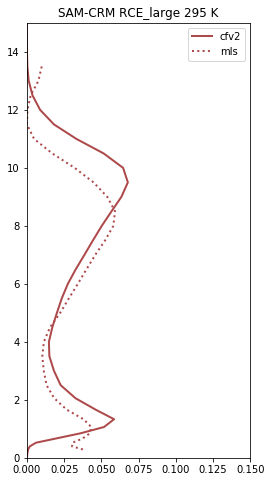

In [4]:
# plot sample profile 
plt.figure(figsize=(4,8))
plt.plot(cfv2,zg2/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle='-',label='cfv2')
plt.plot(s295,z295/1000,color=[cr,cg,cb,ca],linewidth=2,linestyle=':',label='mls')
plt.ylim(0,15)
plt.xlim(0,0.15)
plt.title('SAM-CRM RCE_large 295 K')
plt.legend()
plt.show()